In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
#import pyreadr

In [0]:
%r
install.packages("stargazer") #Use this to install it, do this only once
library(stargazer) # used for R regression output
library(SparkR)    # used to read Spark SQL tables (converted from Python)

In [0]:
data_raw = pd.read_csv(r'https://raw.githubusercontent.com/mattlibonati/Machine-Learning/main/ames_sample.csv')
data_raw

,Unnamed: 0,SID,PID,LotFrontage,LotArea,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,WoodDeckInd,PorchInd,QualityIndex,I2006,I2007,I2008,I2009,I2010,u,train
0,0,1,526301100,141,31770,Corner,NAmes,1Story,6,5,...,1.0,1.0,30,0.0,0.0,0.0,0.0,1.0,0.741664,0.0
1,1,2,526350040,80,11622,Inside,NAmes,1Story,5,6,...,1.0,1.0,30,0.0,0.0,0.0,0.0,1.0,0.888332,0.0
2,2,3,526351010,81,14267,Corner,NAmes,1Story,6,6,...,1.0,1.0,36,0.0,0.0,0.0,0.0,1.0,0.006774,1.0
3,3,4,526353030,93,11160,Corner,NAmes,1Story,7,5,...,0.0,1.0,35,0.0,0.0,0.0,0.0,1.0,0.234958,1.0
4,4,5,527105010,74,13830,Inside,Gilbert,2Story,5,5,...,1.0,1.0,25,0.0,0.0,0.0,0.0,1.0,0.500846,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1130,2924,923250060,80,17400,Inside,Mitchel,1Story,5,5,...,1.0,1.0,25,1.0,0.0,0.0,0.0,0.0,0.609243,1.0
1131,1131,2926,923275080,37,7937,CulDSac,Mitchel,SLvl,6,6,...,1.0,1.0,36,1.0,0.0,0.0,0.0,0.0,0.645906,1.0
1132,1132,2928,923400125,62,10441,Inside,Mitchel,SFoyer,5,5,...,1.0,1.0,25,1.0,0.0,0.0,0.0,0.0,0.155895,1.0
1133,1133,2929,924100070,77,10010,Inside,Mitchel,1Story,5,5,...,1.0,1.0,25,1.0,0.0,0.0,0.0,0.0,0.537924,1.0


In [0]:
processed = data_raw[['TotalSqftCalc','TotalBathCalc','QualityIndex', 
                      'TotRmsAbvGrd','OverallQual','OverallCond','SalePrice']]

processed['log_TotalSqftCalc'] = np.log1p(processed['TotalSqftCalc'])
processed['log_OverallQual'] = np.log1p(processed['OverallQual'])
processed['log_SalePrice'] = np.log1p(processed['SalePrice'])

# this creates a Spark DF than can be referenced by both Python and R
spark.createDataFrame(processed).createOrReplaceTempView('processed') 
spark.sql('select * from processed').display()

<command-3177651816086335>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed['log_TotalSqftCalc'] = np.log1p(processed['TotalSqftCalc'])
<command-3177651816086335>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed['log_OverallQual'] = np.log1p(processed['OverallQual'])
<command-3177651816086335>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

TotalSqftCalc,TotalBathCalc,QualityIndex,TotRmsAbvGrd,OverallQual,OverallCond,SalePrice,log_TotalSqftCalc,log_OverallQual,log_SalePrice
2295,2.0,30,7,6,5,215000,7.738923757439457,1.9459101490553132,12.278397958261774
1508,1.0,30,5,5,6,105000,7.319202458767849,1.791759469228055,11.561725152903833
2252,1.5,36,6,6,6,172000,7.720017940432244,1.9459101490553132,12.055255569732177
3175,3.5,35,8,7,5,244000,8.063377822367027,2.0794415416798357,12.404927602627597
2420,2.5,25,6,5,5,189900,7.791935956938058,1.791759469228055,12.15425816271595
2206,2.5,36,7,6,6,195500,7.699389406256737,1.9459101490553132,12.18332077348399
1804,2.5,35,7,7,5,189000,7.498315870766981,2.0794415416798357,12.149507585033072
1655,2.5,30,7,6,5,175900,7.412160334945205,1.9459101490553132,12.077676615757813
1465,2.5,30,7,6,5,180400,7.290292882446597,1.9459101490553132,12.102937429832547
1978,2.5,35,5,7,5,171500,7.590346945602565,2.0794415416798357,12.052344376474922


Ind_Var,Corr_SalePrice,Corr_log_SalePrice
TotalSqftCalc,0.7856832554595303,0.7671655488574028
log_TotalSqftCalc,0.7261638705655932,0.7408419955204562
OverallQual,0.8245066316820118,0.8599021221269735
log_OverallQual,0.7944509355106579,0.8441849601882581
TotalBathCalc,0.6714113014471872,0.7283815605840914
TotRmsAbvGrd,0.6472544621683056,0.6794651882854046


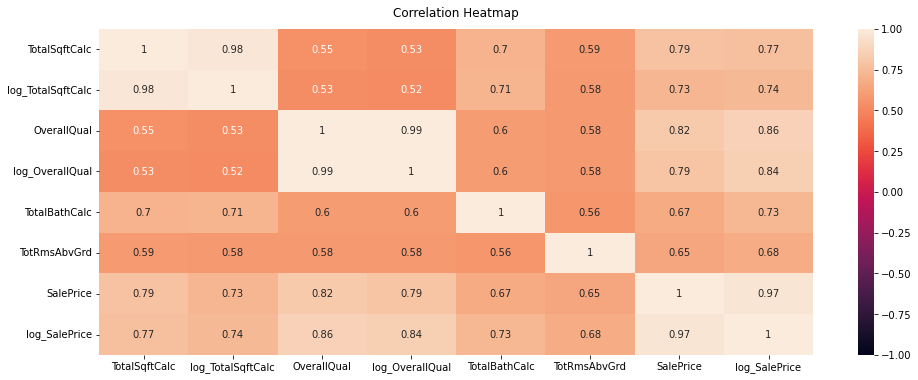

In [0]:
correlation_vars = ['TotalSqftCalc','log_TotalSqftCalc','OverallQual','log_OverallQual','TotalBathCalc','TotRmsAbvGrd','SalePrice','log_SalePrice'] 

# Correlation Matrix 
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(processed[correlation_vars].corr(),  # Pearson Correlation
                      vmin=-1, vmax=1,   # Color Range set from -1 to 1, annot = labels 
                      annot=True)        # Add annotations to the chart

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12); # add chart title


# observe each variables correlation to SalePrice and log_SalePrice
correl_df = pd.DataFrame()

for col in correlation_vars:
    SalePrice, _     = pearsonr(processed[col], processed['SalePrice'])
    log_SalePrice, _ = pearsonr(processed[col], processed['log_SalePrice'])

    tmp_df = pd.DataFrame(data=[[col,SalePrice,log_SalePrice]])
    
    correl_df = pd.concat([correl_df, tmp_df])

correl_df.columns = ['Ind_Var','Corr_SalePrice', 'Corr_log_SalePrice']

display(correl_df[~correl_df['Ind_Var'].str.contains('SalePrice')])

In [0]:
# obtain list of dependent variables
ind_vars = [col for col in correlation_vars if 'SalePrice' not in col]

target_vars = ['SalePrice', 'log_SalePrice']

print('Dependent Variables:\n',target_vars,'\n\nIndependent Variables:\n',ind_vars)

display(processed[ind_vars+target_vars].describe().reset_index())

Dependent Variables:
 ['SalePrice', 'log_SalePrice'] 

Independent Variables:
 ['TotalSqftCalc', 'log_TotalSqftCalc', 'OverallQual', 'log_OverallQual', 'TotalBathCalc', 'TotRmsAbvGrd']


index,TotalSqftCalc,log_TotalSqftCalc,OverallQual,log_OverallQual,TotalBathCalc,TotRmsAbvGrd,SalePrice,log_SalePrice
count,1135.0,1135.0,1135.0,1135.0,1135.0,1135.0,1135.0,1135.0
mean,2121.7920704845815,7.609237129571813,6.302202643171806,1.9724181719199345,2.3378854625550662,6.529515418502203,197211.48546255508,12.12999932111502
std,709.2154326574054,0.3174926838988392,1.3030098427324168,0.1775792704342397,0.7439769469734814,1.3519732895126704,77324.31943755502,0.3393516629329674
min,825.0,6.716594773520978,3.0,1.3862943611198906,1.0,4.0,62383.0,11.04106411122238
25%,1630.5,7.397255069072533,5.0,1.791759469228055,2.0,6.0,142187.5,11.864908824464369
50%,1955.0,7.578656850594762,6.0,1.9459101490553132,2.5,6.0,177500.0,12.086731521684555
75%,2486.0,7.818832443803404,7.0,2.0794415416798357,3.0,7.0,229900.0,12.345403965859694
max,5771.0,8.660773919893762,10.0,2.3978952727983707,4.5,12.0,755000.0,13.534474352733596


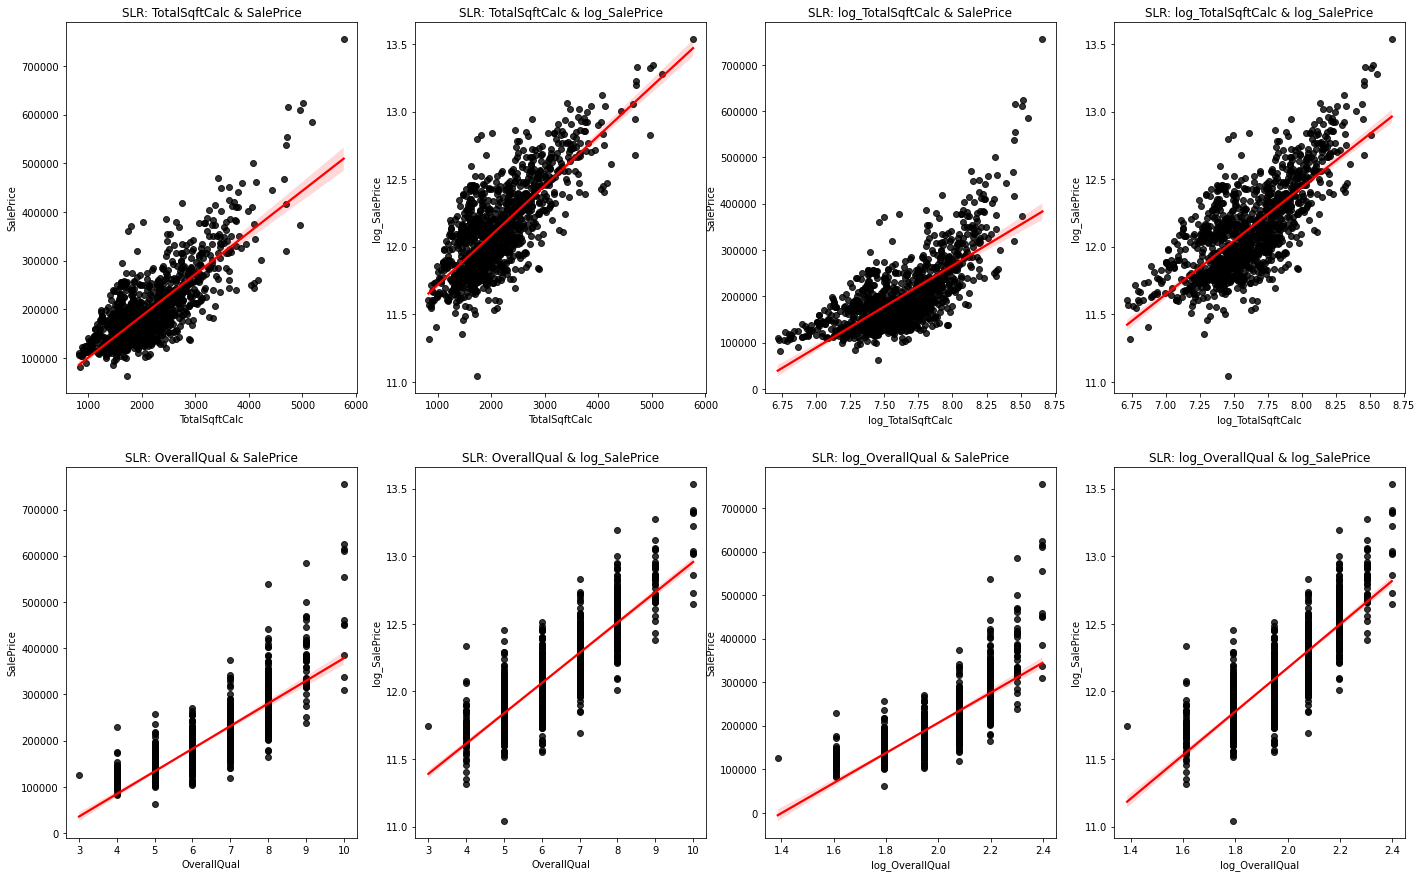

In [0]:
fig, axes = plt.subplots(nrows=2,ncols=4)
fig.set_figheight(15)
fig.set_figwidth(24)

### TotalSqftCalc
sns.regplot(x = 'TotalSqftCalc', y = 'SalePrice', data = processed, 
            scatter_kws={"color": "black"}, line_kws={"color": "red"},
            ax = axes[0,0]).set(title=f'SLR: TotalSqftCalc & SalePrice')

sns.regplot(x = 'TotalSqftCalc', y = 'log_SalePrice', data = processed, 
            scatter_kws={"color": "black"}, line_kws={"color": "red"},
            ax = axes[0,1]).set(title=f'SLR: TotalSqftCalc & log_SalePrice')

sns.regplot(x = 'log_TotalSqftCalc', y = 'SalePrice', data = processed, 
            scatter_kws={"color": "black"}, line_kws={"color": "red"},
            ax = axes[0,2]).set(title=f'SLR: log_TotalSqftCalc & SalePrice')

sns.regplot(x = 'log_TotalSqftCalc', y = 'log_SalePrice', data = processed, 
            scatter_kws={"color": "black"}, line_kws={"color": "red"},
            ax = axes[0,3]).set(title=f'SLR: log_TotalSqftCalc & log_SalePrice')

### OverallQual
sns.regplot(x = 'OverallQual', y = 'SalePrice', data = processed, 
            scatter_kws={"color": "black"}, line_kws={"color": "red"},
            ax = axes[1,0]).set(title=f'SLR: OverallQual & SalePrice')

sns.regplot(x = 'OverallQual', y = 'log_SalePrice', data = processed, 
            scatter_kws={"color": "black"}, line_kws={"color": "red"},
            ax = axes[1,1]).set(title=f'SLR: OverallQual & log_SalePrice')

sns.regplot(x = 'log_OverallQual', y = 'SalePrice', data = processed, 
            scatter_kws={"color": "black"}, line_kws={"color": "red"},
            ax = axes[1,2]).set(title=f'SLR: log_OverallQual & SalePrice')

sns.regplot(x = 'log_OverallQual', y = 'log_SalePrice', data = processed, 
            scatter_kws={"color": "black"}, line_kws={"color": "red"},
            ax = axes[1,3]).set(title=f'SLR: log_OverallQual & log_SalePrice')
    
plt.show()

In [0]:
%r

processed_r <- SparkR::sql('Select * from processed')
processed_r <- collect(processed_r)

m1 <- lm(SalePrice ~ TotalSqftCalc     , data=processed_r)
m2 <- lm(SalePrice ~ OverallQual       , data=processed_r)
m3 <- lm(SalePrice ~ log_TotalSqftCalc , data=processed_r)
m4 <- lm(SalePrice ~ log_OverallQual   , data=processed_r)

stargazer(m1, m2, type="text", 
 dep.var.labels=c("SalePrice"), 
 covariate.labels=c("TotalSqftCalc","OverallQual"), out="models.text")


                                     Dependent variable:     
                                -----------------------------
                                          SalePrice          
                                     (1)            (2)      
-------------------------------------------------------------
TotalSqftCalc                     85.661***                  
                                   (2.004)                   
                                                             
OverallQual                                    48,928.570*** 
                                                 (997.600)   
                                                             
Constant                        15,455.700*** -111,146.300***
                                 (4,482.657)    (6,419.935)  
                                                             
-------------------------------------------------------------
Observations                        1,135          1,135     
R2     

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     2406.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          1.87e-282
Time:                        20:20:32   Log-Likelihood:                -13739.
No. Observations:                1135   AIC:                         2.748e+04
Df Residuals:                    1133   BIC:                         2.749e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.111e+05   6419.935    -17.313      

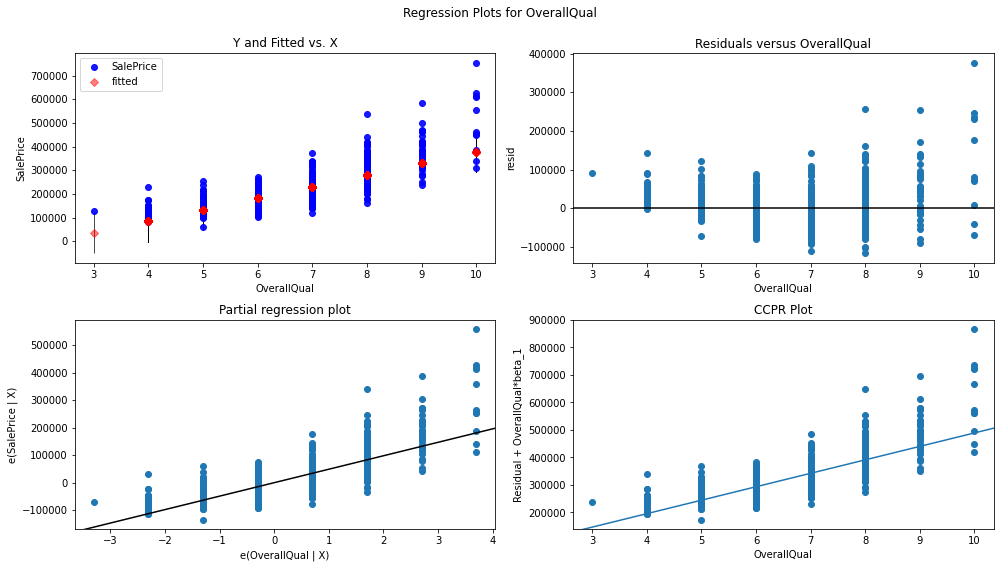

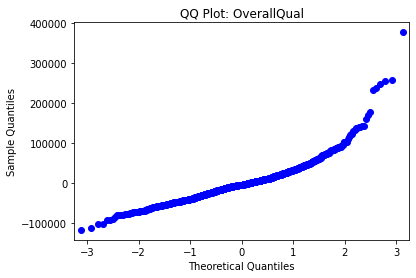

In [0]:
###
# (1) the scatterplot of residuals against the predictor to check for homoscedasticity
# homoskedasticity =  check for cone shaped residual / levene's test for homogeneity of variance
# Source: https://www.geeksforgeeks.org/how-to-create-a-residual-plot-in-python/

# fit simple linear regression model
linear_model = ols('SalePrice ~ OverallQual',
                   data=processed).fit()
  
# display model summary
print(linear_model.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model,
                                    'OverallQual',
                                    fig=fig)

# homoskedasticity tests
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels

name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(linear_model.resid, linear_model.model.exog)
print(f'\nHomoskedasticity Tests:\n {lzip(name, test)}\n')

###
# (2) the quantile-quantile plot to check the distribution assumption of normality.
# Source: https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html

res = linear_model.resid # residuals
fig = sm.qqplot(res)     # stats models qq plot     
plt.title(f'QQ Plot: OverallQual')
plt.show()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     1509.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:37:34   Log-Likelihood:                -13337.
No. Observations:                1135   AIC:                         2.668e+04
Df Residuals:                    1130   BIC:                         2.671e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.336e+05   5080.648    -26.291

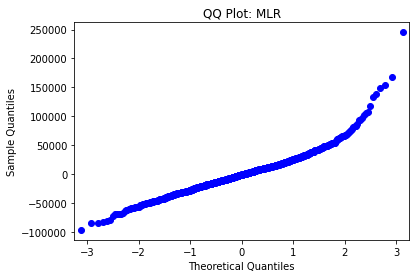


Homoskedasticity Tests:
 [('Lagrange multiplier statistic', 178.70333238391885), ('p-value', 1.4157957028517016e-37), ('f-value', 52.79082643287479), ('f p-value', 8.245580004575617e-41)]



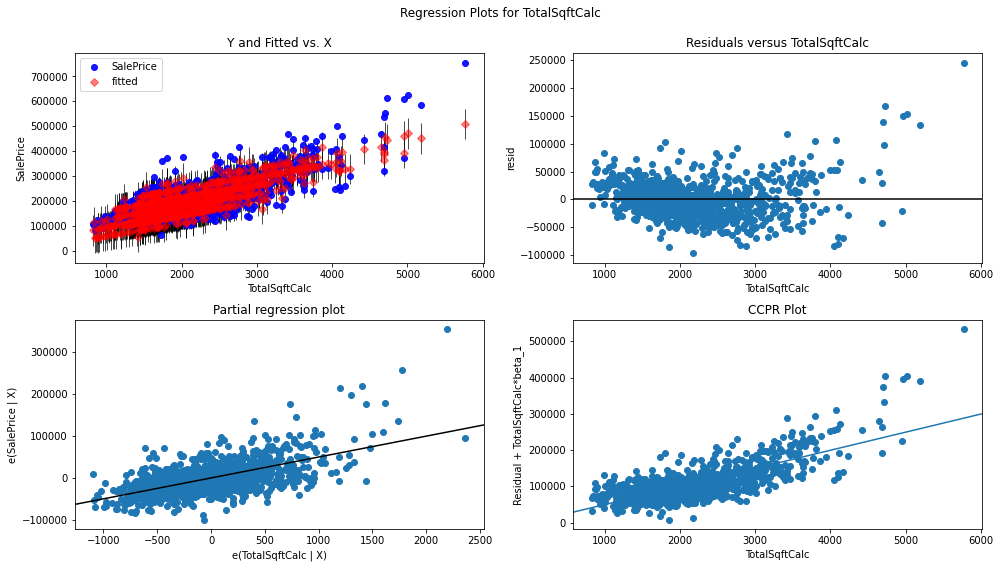

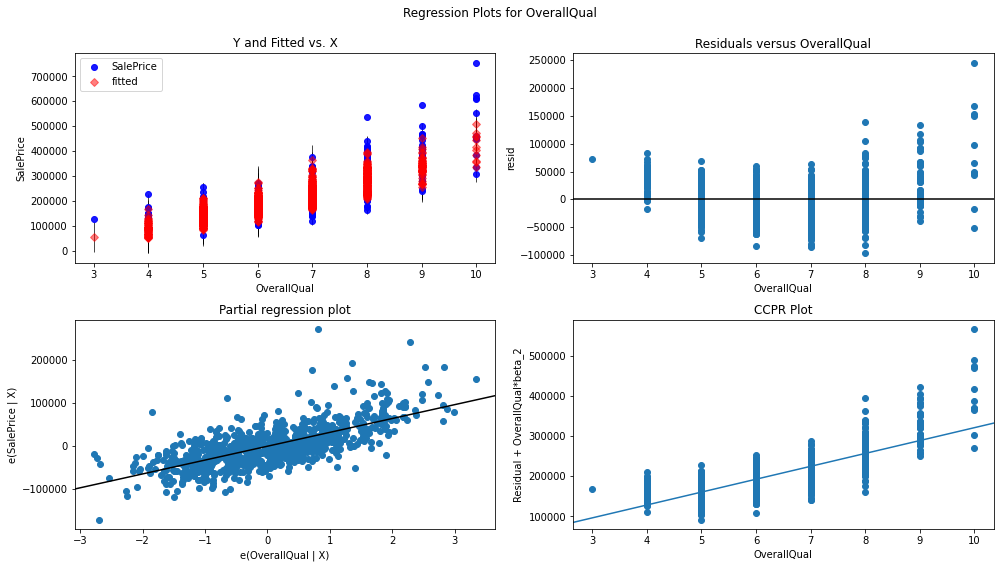

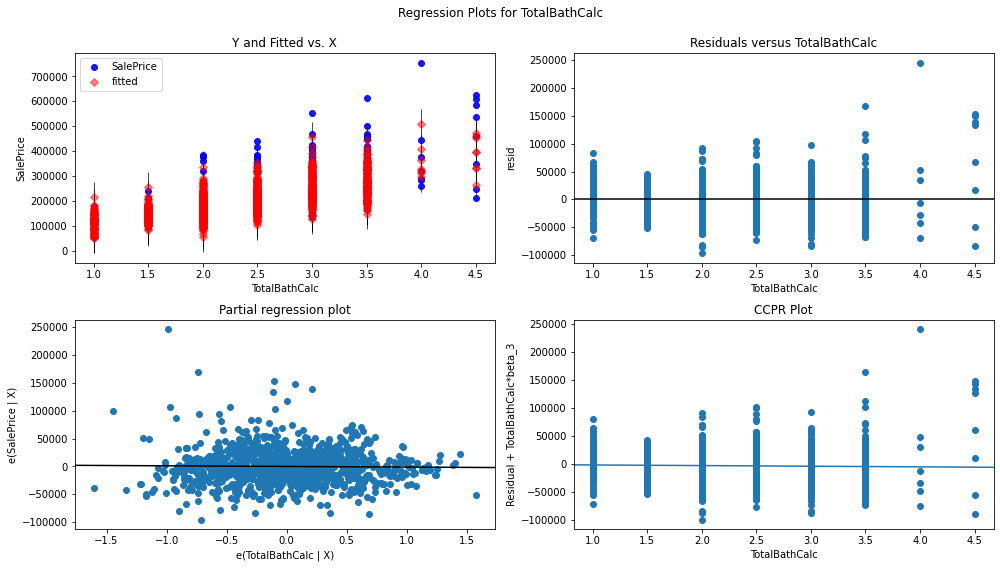

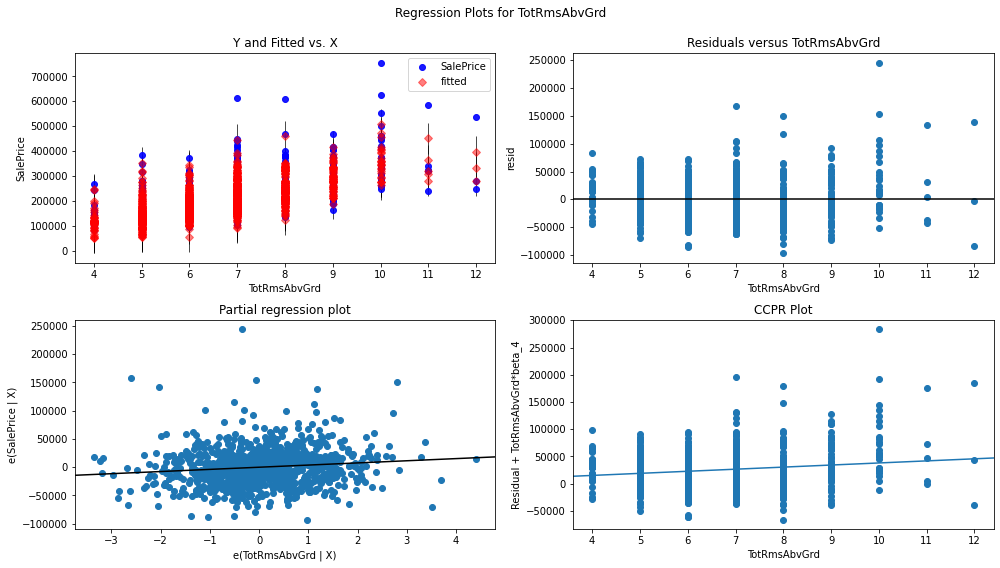

In [0]:
# fit simple linear regression model
mlr = ols('SalePrice ~ TotalSqftCalc + OverallQual + TotalBathCalc + TotRmsAbvGrd',data=processed).fit()

# display model summary
print(mlr.summary())

# Residual Plot
res = mlr.resid          # residuals
fig = sm.qqplot(res)     # stats models qq plot     
plt.title('QQ Plot: MLR')
plt.show()

# homoskedasticity tests
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels

name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(mlr.resid, mlr.model.exog)
print(f'\nHomoskedasticity Tests:\n {lzip(name, test)}\n')

# Diagnostic Plots
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(mlr,
                                    'TotalSqftCalc',
                                    fig=fig)
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(mlr,
                                    'OverallQual',
                                    fig=fig)
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(mlr,
                                    'TotalBathCalc',
                                    fig=fig)
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(mlr,
                                    'TotRmsAbvGrd',
                                    fig=fig)

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     2028.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:47:00   Log-Likelihood:                 809.26
No. Observations:                1135   AIC:                            -1609.
Df Residuals:                    1130   BIC:                            -1583.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.6035      0.020    540.114

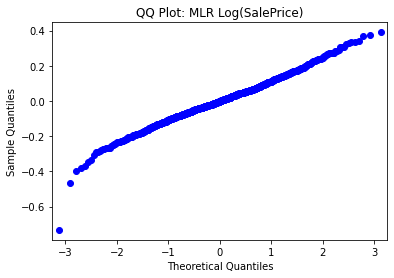


Homoskedasticity Tests:
 [('Lagrange multiplier statistic', 7.919689269358759), ('p-value', 0.09456477608502434), ('f-value', 1.9850512845384558), ('f p-value', 0.09457444026633512)]



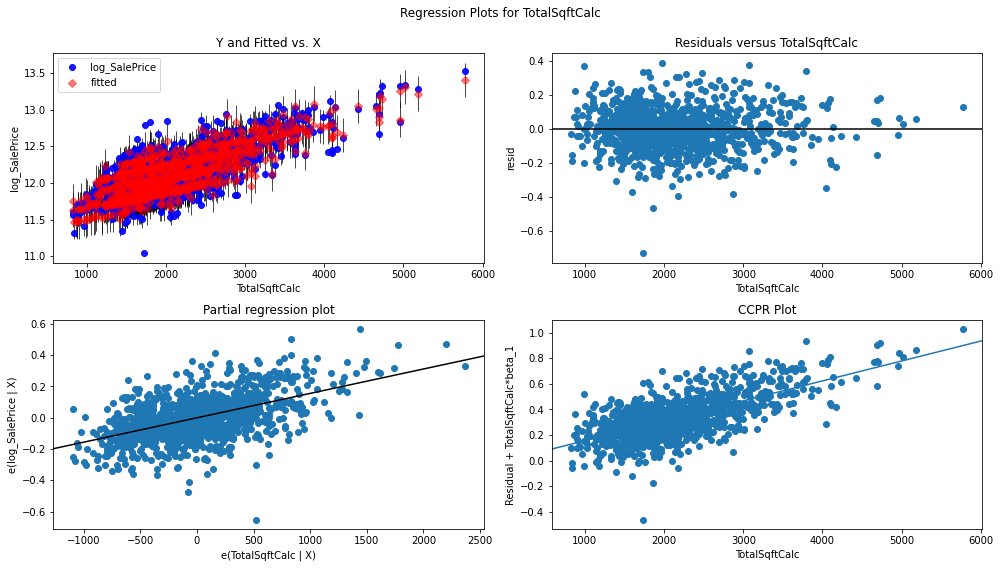

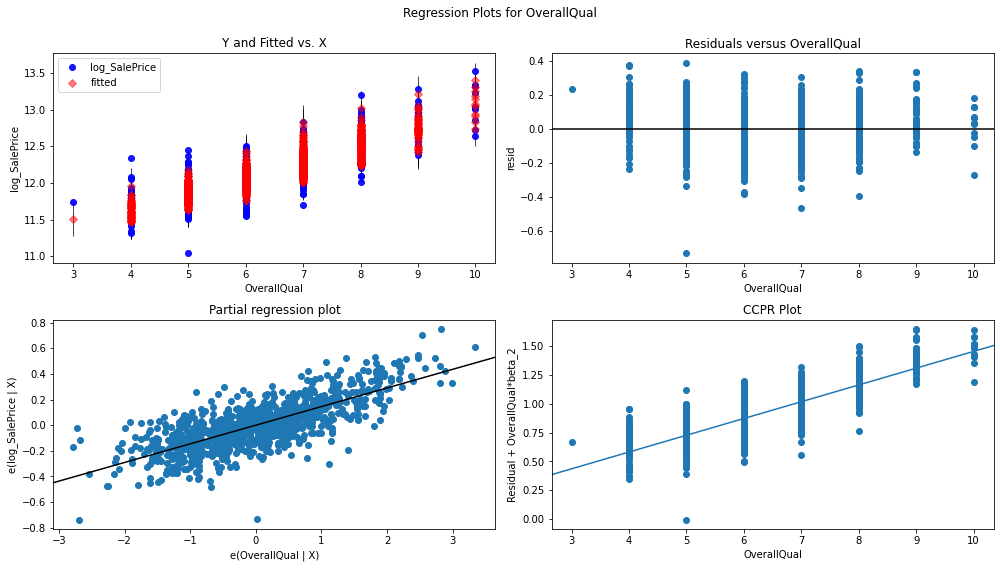

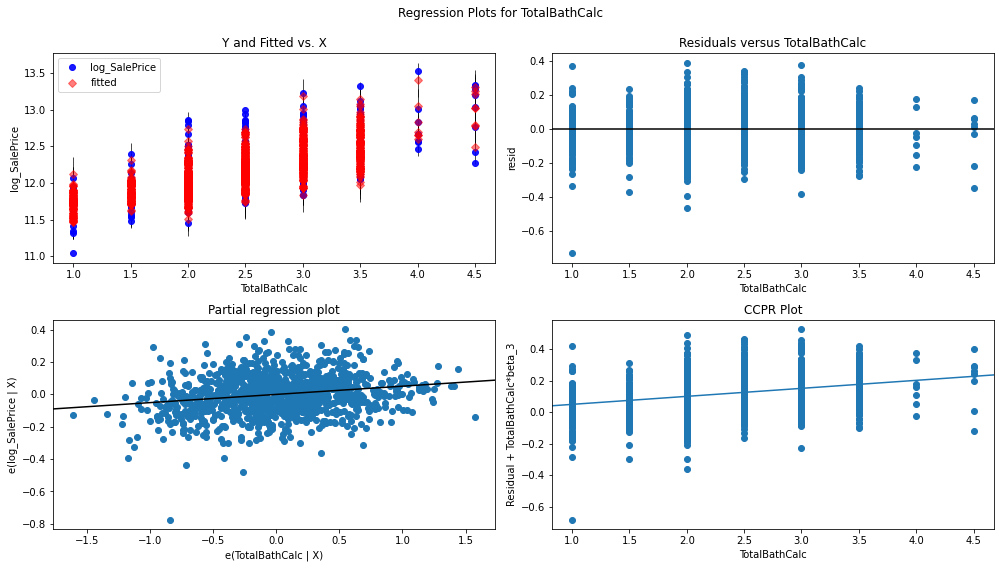

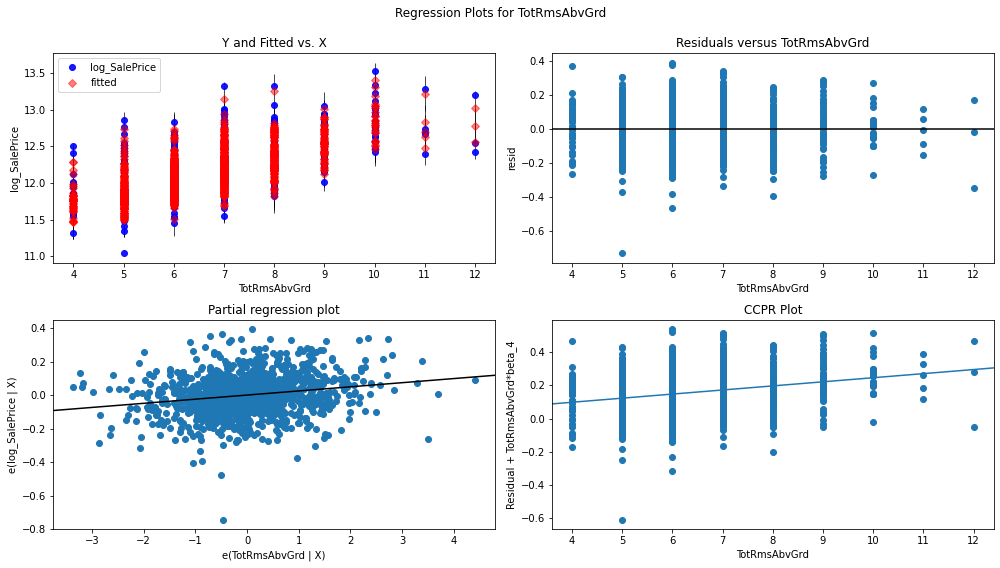

In [0]:
# fit simple linear regression model
mlr_log_sale = ols('log_SalePrice ~ TotalSqftCalc + OverallQual + TotalBathCalc + TotRmsAbvGrd',data=processed).fit()

# display model summary
print(mlr_log_sale.summary())

# Residual Plot
res = mlr_log_sale.resid # residuals
fig = sm.qqplot(res)     # stats models qq plot     
plt.title('QQ Plot: MLR Log(SalePrice)')
plt.show()

# homoskedasticity tests
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(mlr_log_sale.resid, mlr_log_sale.model.exog)
print(f'\nHomoskedasticity Tests:\n {lzip(name, test)}\n')

# Diagnostic Plots
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(mlr_log_sale,
                                    'TotalSqftCalc',
                                    fig=fig)
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(mlr_log_sale,
                                    'OverallQual',
                                    fig=fig)
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(mlr_log_sale,
                                    'TotalBathCalc',
                                    fig=fig)
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(mlr_log_sale,
                                    'TotRmsAbvGrd',
                                    fig=fig)

In [0]:
# https://stackoverflow.com/questions/52562664/regression-model-statsmodel-python
from statsmodels.tools.eval_measures import rmse, meanabs

############
# Sale

X = processed[['TotalSqftCalc','OverallQual','TotalBathCalc','TotRmsAbvGrd']]
ypred = mlr.predict(X)

y = processed['SalePrice'].values.tolist()

rmse_sp = rmse(y, ypred)
rme_sp  = rmse_sp**2 
mae_sp  = meanabs(y, ypred)

print(f'Multi Linear Regression - SalePrice:')
print(f'RMSE:{rmse_sp}')
print(f'RME: {rme_sp}')
print(f'MAE: {mae_sp}\n')

############
# Log Sale
X = processed[['TotalSqftCalc','OverallQual','TotalBathCalc','TotRmsAbvGrd']]
ypred = mlr_log_sale.predict(X)

y = processed['log_SalePrice'].values.tolist()

rmse_lsp = rmse(y, ypred)
rme_lsp  = rmse_lsp**2 
mae_lsp  = meanabs(y, ypred)

print(f'Multi Linear Regression - Log(SalePrice):')
print(f'RMSE:{rmse_lsp}')
print(f'RME: {rme_lsp}')
print(f'MAE: {mae_lsp}')

Multi Linear Regression - SalePrice:
RMSE:30694.571499334666
RME: 942156719.527768
MAE: 22377.798496816715

Multi Linear Regression - Log(SalePrice):
RMSE:0.11860612919033314
RME: 0.014067413881513996
MAE: 0.09096553027226587
